### <code> Bibliotecas y variables globales</code>

In [1]:
# @authors:
#   Anvil.sap            
#   El milanesus
# @date: 2022/09/11




import pandas as pd
import matplotlib.pyplot as plt
from random import randint as rd
from api import generarCsv
# heapSort
I_DF_ORD_YEAR= pd.read_csv("./info_ordenada_i_year.csv")
DF_ORD_YEAR = pd.read_csv("./info_ordenada_year.csv")
# quickSort
DF_ORD_DURAC = pd.read_csv("./info_ordenada_duracion.csv")
I_DF_ORD_DURAC = pd.read_csv("./info_ordenada_i_duracion.csv")
CASO_PROMEDIO = pd.read_csv("./data.csv")
TESTS = 999



def maxMusicYear(musicList):
    max = -1
    for music in musicList:
        if max < music.year:
            max = music.year
    return max
def maxMusicDuracion(musicList):
    max = -1
    for music in musicList:
        if max < music.duration:
            max = music.duration
    return max

# <code>Clases</code>

In [2]:
class Music:
    def __init__(self,data) -> None:
        self.trackName = data[0]
        self.artist = data[1]
        self.album = data[2]
        self.isrc = data[3]
        self.duration = data[4]
        self.year = data[5]
        self.month = data[6]
        self.day = data[7]
    def __repr__(self) -> str:
        str = f"Track Name: {self.trackName}\n"
        str+= f"\tArtist: {self.artist}\n"
        str+= f"\tAlbum: {self.album}\n"
        str+= f"\tIsrc: {self.isrc}\n"
        str+= f"\tDuration(min): {self.duration}\n"
        str+= f"\tDate: {self.year}/{self.month}/{self.day}"
        return str
import math as mt
class Sort:
    def __init__(self,compare=None) -> None:
        self.compare = compare
        self.math = mt
        self.cont_n = 0
        self.cont_k = 0
        self.contEsp = 0
    def countingSortMusics(self,musicList):
        i=0                                     
        C = [0 for _ in range(maxMusicYear(musicList)+1)]       
        self.contEsp+=len(C) 
        while i < len(musicList):                       
            C[musicList[i].year] = C[musicList[i].year] + 1               
            i+=1                                
            self.cont_n+=1
        i=1                                     
        while i<len(C):                         
            C[i]=C[i]+C[i-1]                    
            i+=1                               
            self.cont_k+=1
        i=0                                     
        B = [0 for _ in range(len(musicList))]
        self.contEsp+=len(B)          
        while i < len(musicList):                       
            B[C[musicList[i].year]-1]=musicList[i]                   
            C[musicList[i].year]=C[musicList[i].year]-1                   
            i+=1                                
            self.cont_n+=1
        return B                                

    
           
    def radixSortMusica(self,listaMusicas):
        maxLen = len(str(maxMusicDuracion(listaMusicas)))                  
        i=0                                                     
        buckets = [[] for _ in range(10)]                       
        while i < maxLen:                                    
            j=0                                                 
            while j < len(listaMusicas):                             
                digit= (listaMusicas[j].duration%10**(i+1)) // 10**i
                buckets[digit].append(listaMusicas[j])               
                j+=1                                            
                self.cont_n+=1
            k=0                                                 
            listaMusicas=[]                                          
            while k < 10:
                self.contEsp+=len(buckets[k])                                      
                while len(buckets[k])!=0:                       
                    listaMusicas.append(buckets[k].pop(0))           
                    self.cont_n+=1
                k+=1                                            
                self.cont_n+=1
            i+=1                                                
            self.cont_k+=1
        return listaMusicas                                     


# <code>Counting Sort</code>
## Análisis de Complejidad Algorítmica Temporal.
### Mejores Casos de Complejidad.
Se podría pensar que un caso donde la complejidad se reduce es cuando tenemos un conjunto de la siguiente forma:
$$
A=[1,1,1,1...,1]
$$
Pues para este caso el valor de k es la otra variable de la cual depende nuestra complejidad siendo igual a 1 y por tanto, tendríamos solo $n$ operaciones a realizar, sin embargo este es un caso particular de:
$$
A=[a_1,a_2,a_3,...,a_n]\ \ {a_i}=k\in\N
$$
Y estrictamente aún cuando $k$ toma un valor tan mínimo como 1 sigue siendo una complejidad lineal dando un límite asintótico inferior:
$$
P(k,n)=14k+36n+18\newline
\Omega(k+n)
$$



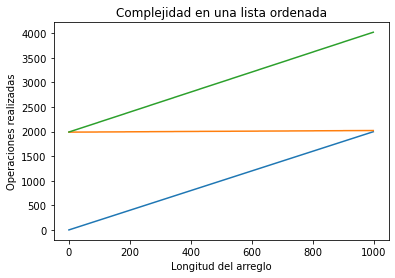

In [3]:
#gráfica
from cProfile import label


X=range(TESTS)
musicas = []
Y=[]
n=[]
k=[]
for i in X:
    musicas.append(Music(list(DF_ORD_YEAR.iloc[i])))
for i in X:
    tt = musicas[:i+1]
    sort = Sort()
    sort.countingSortMusics(tt)
    n.append(sort.cont_n)
    k.append(sort.cont_k)
    Y.append(sort.cont_n+sort.cont_k)


plt.plot(X,n,label="n")
plt.plot(X,k,label="k")
plt.plot(X,Y)
plt.title("Complejidad en una lista ordenada")
plt.xlabel("Longitud del arreglo")
plt.ylabel("Operaciones realizadas")
plt.show()



### Peor Caso de Complejidad.
Si pensamos en un conjunto de la forma:
$$
A=[a_1,a_2,...,a_n]\ \ {a_i}=i!
$$
Entonces $k=n!$ lo cual provoca que la longitud de $C$ crezca de manera factorial pero esto no representa un aumento en la complejidad ya que aún nos tomará $k$ operaciones recorrer todo el arreglo.
$$
P(k,n)=14k+36n+18\newline
\mathcal{O}(k+n)
$$

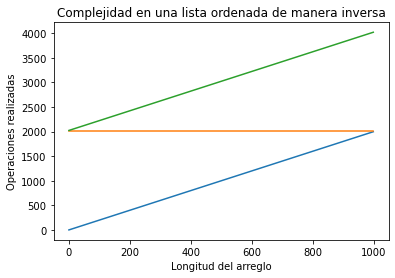

In [4]:
#gráfica
X=range(TESTS)
Y = []
musicas = []
n=[]
k=[]
for i in X:
    musicas.append(Music(list(I_DF_ORD_YEAR.iloc[i])))
for i in X:
    tt = musicas[:i+1]
    sort = Sort()
    sort.countingSortMusics(tt)
    n.append(sort.cont_n)
    k.append(sort.cont_k)
    Y.append(sort.cont_n+sort.cont_k)

plt.plot(X,n,label="n")#azul
plt.plot(X,k,label="k")#naranja
plt.plot(X,Y)#verde
plt.title("Complejidad en una lista ordenada de manera inversa")
plt.xlabel("Longitud del arreglo")
plt.ylabel("Operaciones realizadas")
plt.show()



### Caso Promedio de Complejidad.
En este punto no existe ninguna relación entre las variables $n$ y $k$. No podemos afirmar que mientras más grande sea $n$, hay más probabilidades de que $k$ sea mayor pues rapidamente podríamos tener casos como el siguiente:
$$
A=[a_1,a_2,a_3,...,a_n]\ \ {a_i}=k\in\N
$$
Por otra parte, el que $k$ crezca no implica que $n$ tambien lo haga, por ejemplo:
$$
A=[1000000000]
$$ 
Lo anterior nos muestra de manera extrema la independencia entre ambas variables por lo que:
$$
P(k,n)=14k+36n+18\newline
\theta(k+n)
$$

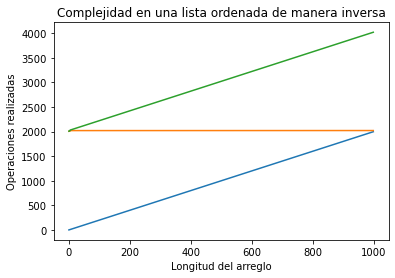

In [5]:
#gráfica
X=range(TESTS)
Y = []
musicas = []
n=[]
k=[]
for i in X:
    musicas.append(Music(list(CASO_PROMEDIO.iloc[i])))
for i in X:
    tt = musicas[:i+1]
    sort = Sort()
    sort.countingSortMusics(tt)
    n.append(sort.cont_n)
    k.append(sort.cont_k)
    Y.append(sort.cont_n+sort.cont_k)

plt.plot(X,n,label="n")
plt.plot(X,k,label="k")
plt.plot(X,Y)
plt.title("Complejidad en una lista ordenada de manera inversa")
plt.xlabel("Longitud del arreglo")
plt.ylabel("Operaciones realizadas")
plt.show()

## Analisis de Complejidad Espacial
### Mejor Caso 
En una lista ordenada correctamente la variaciió del uso de memoria es $k$ , por la creación es $C$ mas$n$  por $B$  siendo entonces unacomplejidad espaciaal 
$$S(k+n)$$
Donde $k$ es el elemento mmáimo de nuestro conjuntoo y $n$ es la cantidad de elementos.

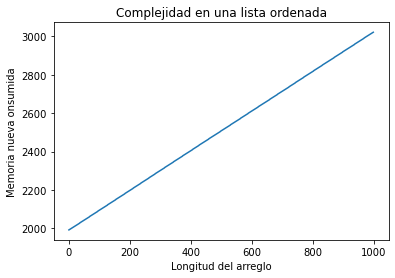

In [6]:
#gráfica
X=range(TESTS)
Y = []
musicas = []

for i in X:
    musicas.append(Music(list(DF_ORD_YEAR.iloc[i])))
for i in X:
    tt = musicas[:i+1]
    sort = Sort()
    sort.countingSortMusics(tt)
    Y.append(sort.contEsp)

plt.plot(X,Y)
plt.title("Complejidad en una lista ordenada")
plt.xlabel("Longitud del arreglo")
plt.ylabel("Memoria nueva onsumida")
plt.show()

### Peor Caso de complejidad Espacial
En una lista ordenada de manera inversa el primer elemento es $k$ pero nuevamente no existe una relación entre la magnitud de $n$ y la de $k$ por lo que todo el consumo de memoria adicional es generado por la magnitud de $C(k)$ y $B(n)$ siendo una complejidad:
$$S(k+n)$$

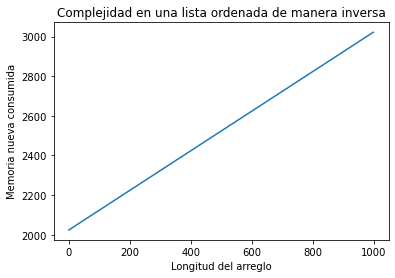

In [7]:
#gráficas
X=range(TESTS)
Y = []
musicas = []
for i in X:
    musicas.append(Music(list(I_DF_ORD_YEAR.iloc[i])))
for i in X:
    tt = musicas[:i+1]
    sort = Sort()
    sort.countingSortMusics(tt)
    Y.append(sort.contEsp)

plt.plot(X,Y)
plt.title("Complejidad en una lista ordenada de manera inversa")
plt.xlabel("Longitud del arreglo")
plt.ylabel("Memoria nueva consumida")
plt.show()

### Caso promedio de complejidad espacial
En todos los casos necesitaremos una cantidad de memoria al crear el arreglo C y B, la cantidad de memoria necesaria esta en función de $k$ por lo que necesitaríamos un arreglo C con el tamaño del número máximo de A para almacenar los contadores necesarios, aparte en B se necesitan $n$ espacios en memoria para almacenar información dando una complejidad de:
$$S(k+n)$$

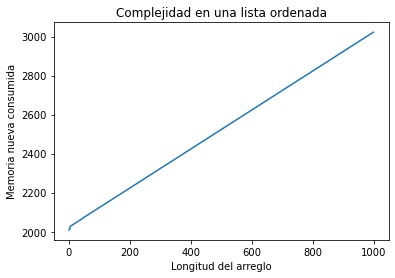

In [8]:
#gráfica
X=range(TESTS)
Y = []
musicas = []
for i in X:
    musicas.append(Music(list(CASO_PROMEDIO.iloc[i])))
for i in X:
    tt = musicas[:i+1]
    sort = Sort()
    sort.countingSortMusics(tt)
    Y.append(sort.contEsp)

plt.plot(X,Y)
plt.title("Complejidad en una lista ordenada")
plt.xlabel("Longitud del arreglo")
plt.ylabel("Memoria nueva consumida")
plt.show()

# <code>Radix Sort</code>
## Analisis de Complejidad Algoritmitca.
### Mejor Caso de Complejidad.
En una lista completamente ordenada nuestro algoritmo tendría una complejidad $\mathcal{O}(kn)$ porque no existe una relación propiamente directa entre $k$ y $n$, lo único certero en este caso es que $k$ es el elemento que está en la posición $n$.
Las buckets no tendrían una distribución en especial pero es seguro que la suma de todas las longitudes es $n$ para que cuando estamos haciendo pop a cada una de las 10 buckets se piense en una complejidad igual a $n$.
$$
P(k,n)=85kn+115k+22\newline
\Omega(kn)
$$




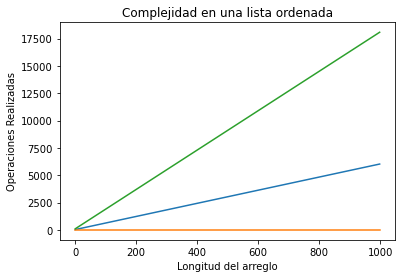

In [9]:
#gráfica
X=range(TESTS)
Y = []
n=[]
k=[]
musicas = []
for i in X:
    musicas.append(Music(list(DF_ORD_DURAC.iloc[i])))
for i in X:
    tt = musicas[:i+1]
    sort = Sort()
    sort.radixSortMusica(tt)
    n.append(sort.cont_n)
    k.append(sort.cont_k)
    Y.append(sort.cont_n*sort.cont_k)
    
plt.plot(X,n,label="n")
plt.plot(X,k,label="k")
plt.plot(X,Y)
plt.title("Complejidad en una lista ordenada")
plt.xlabel("Longitud del arreglo")
plt.ylabel("Operaciones Realizadas")
plt.show()

### Peor Caso de Complejidad.
Cuando nuestra lista esta ordenada de manera descendente el algoritmo no cambia su complejidad porque cuando se pase a insertar en las buckets aún habría que recorrer todo el conjunto $n$ veces para saber donde almacenar nuestros valores, luego habrá que sacarlo pero en total solo podríamos hacer $n$ llamadas a pop para dejar vacías las buckets. $k$ que es nuestra segunda variable no tendría un cambio y seguiría generando otra complejidad lineal dando:
$$\mathcal{O}(kn)$$

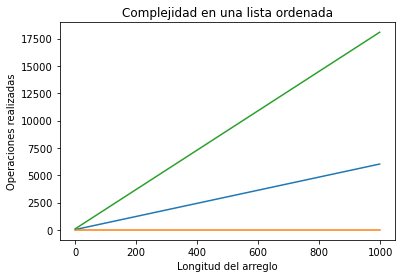

In [10]:
#gráfica
X=range(TESTS)
Y = []
n=[]
k=[]
musicas = []
for i in X:
    musicas.append(Music(list(I_DF_ORD_DURAC.iloc[i])))
for i in X:
    tt = musicas[:i+1]
    sort = Sort()
    sort.radixSortMusica(tt)
    n.append(sort.cont_n)
    k.append(sort.cont_k)
    Y.append(sort.cont_n*sort.cont_k)

plt.plot(X,n)#azul
plt.plot(X,k)#naranja
plt.plot(X,Y)#verde
plt.title("Complejidad en una lista ordenada")
plt.xlabel("Longitud del arreglo")
plt.ylabel("Operaciones realizadas")
plt.show()

### Caso promedio de Complejidad.
Cuando el conjunto es aleatorio $n$ y $k$ no se correlacionan. Hacer inserciones a las buckets nos toma $n$ operaciones pues hay que recorrer toda la lista y sacar tados los elementos igulamente $n$ porque al final la suma de todas las buckets es $n$, por otra parte, $k$ nos obliga a hacer los anteriores procesos de manera iterativa por lo que estas se multiplican.
$$\theta(kn)$$

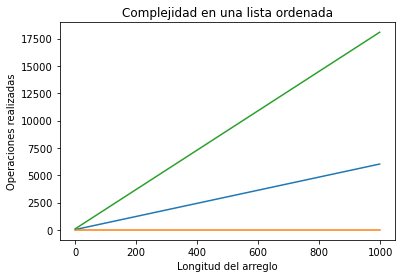

In [11]:
#gráfica
X=range(TESTS)
Y = []
n=[]
k=[]
musicas = []
for i in X:
    musicas.append(Music(list(CASO_PROMEDIO.iloc[i])))
for i in X:
    tt = musicas[:i+1]
    sort = Sort()
    sort.radixSortMusica(tt)
    n.append(sort.cont_n)
    k.append(sort.cont_k)
    Y.append(sort.cont_n*sort.cont_k)

plt.plot(X,n)#azul
plt.plot(X,k)#naranja
plt.plot(X,Y)#verde
plt.title("Complejidad en una lista ordenada")
plt.xlabel("Longitud del arreglo")
plt.ylabel("Operaciones realizadas")
plt.show()

## Analisis de Complejidad Espacial.
### Mejor Caso.
En nuestra implementación lo que genera un consumo de memoria son lo buckets la cual, como se había comentado, almacena siempre $n$ elementos por lo que en una lista ordenada realmente el consumo sería con una complejidad de $n$.
$$S(n)$$


Text(0, 0.5, 'Memoria consumida')

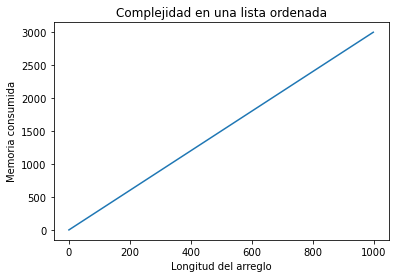

In [12]:
#gráfica
X=range(TESTS)
Y = []
musicas = []
for i in X:
    musicas.append(Music(list(DF_ORD_DURAC.iloc[i])))
for i in X:
    tt = musicas[:i+1]
    sort = Sort()
    sort.radixSortMusica(tt)
    Y.append(sort.contEsp)

plt.plot(X,Y)
plt.title("Complejidad en una lista ordenada")
plt.xlabel("Longitud del arreglo")
plt.ylabel("Memoria consumida")

## Peor Caso.
Cuando la lista esta ordenada de manera inversa no significa un gran cambio en como va actuar el algoritmo, se hara una busqueda del máximo y luego se iterará $k$ veces (k es el número de dígitos) para en cada una de ellas contruir las buckets y reconstruir la lista original, en esta parte es en donde se genera el consumo de memoria el cual será nuevamente lineal en función de $n$.
$$S(n)$$


Text(0, 0.5, 'Memoria nueva consumida')

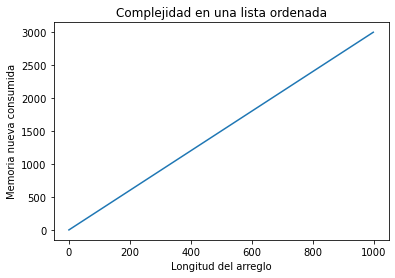

In [13]:
X=range(TESTS)
Y = []
musicas = []
for i in X:
    musicas.append(Music(list(I_DF_ORD_DURAC.iloc[i])))
for i in X:
    tt = musicas[:i+1]
    sort = Sort()
    sort.radixSortMusica(tt)
    Y.append(sort.contEsp)

plt.plot(X,Y)
plt.title("Complejidad en una lista ordenada")
plt.xlabel("Longitud del arreglo")
plt.ylabel("Memoria nueva consumida")

### Caso Promedio de Complejidad.
Dado que el peor y el mejor caso de complejidad son iguales entonces para el caso promedio tendremos una complejidad igual.
$$S(n)$$

Text(0, 0.5, 'Memoria nueva consumida')

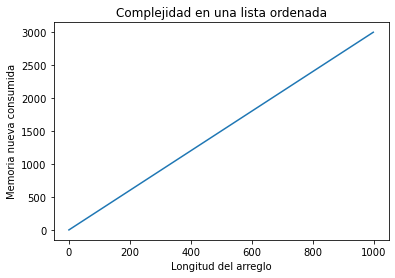

In [14]:
X=range(TESTS)
Y = []
musicas = []
for i in X:
    musicas.append(Music(list(CASO_PROMEDIO.iloc[i])))
for i in X:
    tt = musicas[:i+1]
    sort = Sort()
    sort.radixSortMusica(tt)
    Y.append(sort.contEsp)

plt.plot(X,Y)
plt.title("Complejidad en una lista ordenada")
plt.xlabel("Longitud del arreglo")
plt.ylabel("Memoria nueva consumida")